# Установка PySpark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null #установка java

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz #скачиваем дистрибутив спарка

In [0]:
!tar -xvf spark-2.4.3-bin-hadoop2.7.tgz #распаковываем

spark-2.4.3-bin-hadoop2.7/
spark-2.4.3-bin-hadoop2.7/python/
spark-2.4.3-bin-hadoop2.7/python/setup.cfg
spark-2.4.3-bin-hadoop2.7/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/resultiterable.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/shell.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/heapq3.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/join.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/version.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/rdd.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/java_gateway.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/find_spark_home.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/_globals.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/worker.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/accumulators.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/feature.py
spark-2.4.3-bin-hadoop2.7/python/pyspark

In [0]:
!pip install -q findspark #устанавливаем спец пакеты на машину

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7" #добавляем переменные окружения

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate() #иницииализируем спарк

# Загрузка данных из CSV

In [0]:
df = spark.read.csv('power.csv', inferSchema=True, header=True)

# Базовый обзор данных

In [0]:
df.count()

1189482

In [0]:
df.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('quantity', 'double'),
 ('category', 'int')]

In [0]:
df.take(2)

[Row(country='Austria', year=1996, quantity=5.0, category=1),
 Row(country='Austria', year=1995, quantity=17.0, category=1)]

# Практика 1. Загрузите данные из файла transactions.csv. Выведите 10 первых строчек

In [0]:
dt = spark.read.csv('transactions.csv', inferSchema=True, header=True)
dt.take(10)

[Row(Year=2017, Month=1, ID='t001', Product='A1', Amount=7, Price=2904, Total=20328, Cost=1200),
 Row(Year=2017, Month=1, ID='t002', Product='A2', Amount=2, Price=1896, Total=3792, Cost=1100),
 Row(Year=2017, Month=2, ID='t003', Product='A1', Amount=5, Price=2904, Total=14520, Cost=1200),
 Row(Year=2017, Month=2, ID='t004', Product='A4', Amount=1, Price=8618, Total=8618, Cost=4200),
 Row(Year=2017, Month=2, ID='t005', Product='A5', Amount=3, Price=5175, Total=15525, Cost=500),
 Row(Year=2017, Month=2, ID='t006', Product='_6', Amount=4, Price=3500, Total=14000, Cost=200),
 Row(Year=2017, Month=3, ID='t007', Product='_3', Amount=6, Price=1265, Total=7590, Cost=200),
 Row(Year=2017, Month=3, ID='t008', Product='_5', Amount=2, Price=5175, Total=10350, Cost=1200),
 Row(Year=2017, Month=4, ID='t009', Product='_8', Amount=3, Price=3760, Total=11280, Cost=1000),
 Row(Year=2017, Month=4, ID='t010', Product='_4', Amount=2, Price=8618, Total=17236, Cost=3400)]

In [0]:
dt.show(10)

+----+-----+----+-------+------+-----+-----+----+
|Year|Month|  ID|Product|Amount|Price|Total|Cost|
+----+-----+----+-------+------+-----+-----+----+
|2017|    1|t001|     A1|     7| 2904|20328|1200|
|2017|    1|t002|     A2|     2| 1896| 3792|1100|
|2017|    2|t003|     A1|     5| 2904|14520|1200|
|2017|    2|t004|     A4|     1| 8618| 8618|4200|
|2017|    2|t005|     A5|     3| 5175|15525| 500|
|2017|    2|t006|     _6|     4| 3500|14000| 200|
|2017|    3|t007|     _3|     6| 1265| 7590| 200|
|2017|    3|t008|     _5|     2| 5175|10350|1200|
|2017|    4|t009|     _8|     3| 3760|11280|1000|
|2017|    4|t010|     _4|     2| 8618|17236|3400|
+----+-----+----+-------+------+-----+-----+----+
only showing top 10 rows



# Выборки

In [0]:
df_lim = df.select('country', 'year', 'quantity')
df_lim.take(1)

[Row(country='Austria', year=1996, quantity=5.0)]

In [0]:
df_lim = df_lim.withColumnRenamed('year', 'y')
df_lim

DataFrame[country: string, y: int, quantity: double]

In [0]:
df_lim.columns

['country', 'y', 'quantity']

# Описание и статистики

In [0]:
df_lim.show()

+-------+----+--------+
|country|   y|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
|Austria|1995|    17.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|    35.0|
|Belgium|2011|    25.0|
|Belgium|2010|    22.0|
|Belgium|2009|    45.0|
|Czechia|1998|     1.0|
|Czechia|1995|     7.0|
|Finland|2010|     9.0|
|Finland|2009|    13.0|
|Finland|2008|    39.0|
|Finland|2007|    21.0|
|Finland|2006|     0.0|
|Finland|2005|     0.0|
|Finland|2004|     0.0|
|Finland|2003|     0.0|
|Finland|2002|     0.0|
|Finland|2001|     0.0|
+-------+----+--------+
only showing top 20 rows



In [0]:
df_lim.describe().show()

+-------+-----------+------------------+--------------------+
|summary|    country|                 y|            quantity|
+-------+-----------+------------------+--------------------+
|  count|    1189482|           1189482|             1189482|
|   mean|       null|2002.8515538696677|  184264.77005012735|
| stddev|       null| 7.167344581291499|1.5856628141359948E7|
|    min|Afghanistan|              1990|           -864348.0|
|    max|   Zimbabwe|              2014|          6.680329E9|
+-------+-----------+------------------+--------------------+



# Сохранение

In [0]:
df_lim.write.format('com.databricks.spark.csv').option('header', 'true').save('df_lim.csv')

Сохраняет каждую партицию dataframe в отдельный csv файл

# Отложенные вычисления

In [0]:
df_lim = df_lim.withColumn('quantity x 2', df_lim['quantity'] * 2)

In [0]:
df_grp = df_lim.groupBy('country')

In [0]:
df_sum = df_grp.sum('quantity', 'quantity x 2')

In [0]:
# Здесь произойдут основные вычисления
df_sum.show()

+------------------+--------------------+--------------------+
|           country|       sum(quantity)|   sum(quantity x 2)|
+------------------+--------------------+--------------------+
|     Côte d'Ivoire| 2.815485732456253E7| 5.630971464912506E7|
|              Chad|  3796498.7491319943|   7592997.498263989|
|          Paraguay|     1.23209483765E7|      2.4641896753E7|
|          Anguilla|   20529.34999999997|   41058.69999999994|
|             Yemen|1.8178937740390217E8|3.6357875480780435E8|
|State of Palestine|  1318668.0123446316|   2637336.024689263|
|           Senegal|   6944395.348079733|1.3888790696159465E7|
|            Sweden|1.3456236759933385E8| 2.691247351986677E8|
|        Cabo Verde|   88130.27080000004|  176260.54160000008|
|          Kiribati|   6450.091429000002|  12900.182858000004|
|            Guyana|   772150.6722661877|  1544301.3445323755|
|       Philippines|  8.45277094530091E7| 1.690554189060182E8|
|           Eritrea|   918454.1476713057|  1836908.2953

# Практика 2. Выведите максимальную и минимальную (2 датафрейма) количество (Amount) по продукту

In [0]:
dt_grp = dt.groupBy('Product')
dt_formax = dt_grp.max('Amount')
dt_formax.show(10)

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [0]:
dt_formin = dt.groupBy('Product').min('Amount')
dt_formin.show(10)

+-------+-----------+
|Product|min(Amount)|
+-------+-----------+
|     _5|          1|
|     _2|          1|
|     A2|          2|
|     _8|          1|
|     _3|          2|
|     _4|          1|
|     _6|          4|
|     A4|          1|
|     A5|          2|
|     A1|          2|
+-------+-----------+



# Соединения

In [0]:
from pyspark.sql import Row

row = Row("name", "pet", "count")

In [0]:
sc = spark.sparkContext

In [0]:
df1 = sc.parallelize([
    row("Sue", "cat", 16),
    row("Kim", "dog", 1),    
    row("Bob", "fish", 5)
    ]).toDF()

df2 = sc.parallelize([
    row("Fred", "cat", 2),
    row("Kate", "ant", 179),    
    row("Marc", "lizard", 5)
    ]).toDF()

df3 = sc.parallelize([
    row("Sarah", "shark", 3),
    row("Jason", "kids", 2),    
    row("Scott", "squirrel", 1)
    ]).toDF()

In [0]:
df_union = df1.unionAll(df2).unionAll(df3)
df_union.show()

+-----+--------+-----+
| name|     pet|count|
+-----+--------+-----+
|  Sue|     cat|   16|
|  Kim|     dog|    1|
|  Bob|    fish|    5|
| Fred|     cat|    2|
| Kate|     ant|  179|
| Marc|  lizard|    5|
|Sarah|   shark|    3|
|Jason|    kids|    2|
|Scott|squirrel|    1|
+-----+--------+-----+



In [0]:
row1 = Row("name", "pet", "count")
row2 = Row("name", "pet2", "count2")

In [0]:
df1 = sc.parallelize([
    row1("Sue", "cat", 16),
    row1("Kim", "dog", 1),    
    row1("Bob", "fish", 5),
    row1("Libuse", "horse", 1)
    ]).toDF()

df2 = sc.parallelize([
    row2("Sue", "eagle", 2),
    row2("Kim", "ant", 179),    
    row2("Bob", "lizard", 5),
    row2("Ferdinand", "bees", 23)
    ]).toDF()

In [0]:
df1.join(df2, 'name', how='inner').show()

+----+----+-----+------+------+
|name| pet|count|  pet2|count2|
+----+----+-----+------+------+
| Sue| cat|   16| eagle|     2|
| Bob|fish|    5|lizard|     5|
| Kim| dog|    1|   ant|   179|
+----+----+-----+------+------+



In [0]:
df1.join(df2, 'name', how='outer').show()

+---------+-----+-----+------+------+
|     name|  pet|count|  pet2|count2|
+---------+-----+-----+------+------+
|      Sue|  cat|   16| eagle|     2|
|Ferdinand| null| null|  bees|    23|
|      Bob| fish|    5|lizard|     5|
|      Kim|  dog|    1|   ant|   179|
|   Libuse|horse|    1|  null|  null|
+---------+-----+-----+------+------+



In [0]:
df1.join(df2, 'name', how='left').show()

+------+-----+-----+------+------+
|  name|  pet|count|  pet2|count2|
+------+-----+-----+------+------+
|   Sue|  cat|   16| eagle|     2|
|   Bob| fish|    5|lizard|     5|
|   Kim|  dog|    1|   ant|   179|
|Libuse|horse|    1|  null|  null|
+------+-----+-----+------+------+



In [0]:
df1.join(df2, 'name', how='right').show()

+---------+----+-----+------+------+
|     name| pet|count|  pet2|count2|
+---------+----+-----+------+------+
|      Sue| cat|   16| eagle|     2|
|Ferdinand|null| null|  bees|    23|
|      Bob|fish|    5|lizard|     5|
|      Kim| dog|    1|   ant|   179|
+---------+----+-----+------+------+



# Практика 3. При помощи операции соединения выведите максимальное, минимальное и среднее (avg) количество (Amount) по продукту

In [0]:
dt1 = dt_formin.join(dt_formax, 'Product', how='outer')
dt1.show()

+-------+-----------+-----------+
|Product|min(Amount)|max(Amount)|
+-------+-----------+-----------+
|     _5|          1|          6|
|     _2|          1|          8|
|     A2|          2|          2|
|     _8|          1|         10|
|     _3|          2|          7|
|     _4|          1|          3|
|     _6|          4|          4|
|     A4|          1|          3|
|     A5|          2|          7|
|     A1|          2|          9|
+-------+-----------+-----------+



In [0]:
dt_res = dt1.join(dt.groupBy('Product').avg('Amount'), 'Product', how='outer')
dt_res.show()

+-------+-----------+-----------+------------------+
|Product|min(Amount)|max(Amount)|       avg(Amount)|
+-------+-----------+-----------+------------------+
|     _5|          1|          6|3.5454545454545454|
|     _2|          1|          8|              4.75|
|     A2|          2|          2|               2.0|
|     _8|          1|         10|               3.5|
|     _3|          2|          7| 4.285714285714286|
|     _4|          1|          3|               2.0|
|     _6|          4|          4|               4.0|
|     A4|          1|          3|               2.0|
|     A5|          2|          7|               4.0|
|     A1|          2|          9|               5.6|
+-------+-----------+-----------+------------------+



# Сводники

In [0]:
df_lim.show()

+-------+----+--------+------------+
|country|   y|quantity|quantity x 2|
+-------+----+--------+------------+
|Austria|1996|     5.0|        10.0|
|Austria|1995|    17.0|        34.0|
|Belgium|2014|     0.0|         0.0|
|Belgium|2013|     0.0|         0.0|
|Belgium|2012|    35.0|        70.0|
|Belgium|2011|    25.0|        50.0|
|Belgium|2010|    22.0|        44.0|
|Belgium|2009|    45.0|        90.0|
|Czechia|1998|     1.0|         2.0|
|Czechia|1995|     7.0|        14.0|
|Finland|2010|     9.0|        18.0|
|Finland|2009|    13.0|        26.0|
|Finland|2008|    39.0|        78.0|
|Finland|2007|    21.0|        42.0|
|Finland|2006|     0.0|         0.0|
|Finland|2005|     0.0|         0.0|
|Finland|2004|     0.0|         0.0|
|Finland|2003|     0.0|         0.0|
|Finland|2002|     0.0|         0.0|
|Finland|2001|     0.0|         0.0|
+-------+----+--------+------------+
only showing top 20 rows



In [0]:
df_lim.groupby('country').pivot('y').sum('quantity').show()

+------------------+--------------------+------------------+------------------+--------------------+------------------+--------------------+------------------+--------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+
|           country|                1990|              1991|              1992|                1993|              1994|                1995|              1996|                1997|              1998|              1999|              2000|              2001|              2002|                2003|                2004|                2005|                2006|                2007|                2008|                2009|                2010|               2011|          

# Практика 4. Постройте разбивку по количеству продуктов по месяцам

In [0]:
dt.groupby('Product').pivot('Month').sum('Amount').show()

+-------+----+----+----+----+----+----+----+----+----+----+----+----+
|Product|   1|   2|   3|   4|   5|   6|   7|   8|   9|  10|  11|  12|
+-------+----+----+----+----+----+----+----+----+----+----+----+----+
|     _5|null|null|   2|   5|  10|   2|null|   1|   6|   6|   5|   2|
|     _2|null|null|null|   4|   2|   1|  10|null|   8|null|   5|   8|
|     A2|   2|null|null|null|null|null|null|null|null|null|   2|null|
|     _8|null|null|null|   6|null|  13|null|null|   1|   3|null|   5|
|     _3|null|null|   6|null|  12|null|null|   2|   3|   3|null|   4|
|     _4|null|null|null|   3|null|   3|   2|null|   2|   2|null|   2|
|     _6|null|   4|null|null|   4|null|null|null|null|null|null|null|
|     A4|null|   1|null|null|   3|null|   3|null|null|null|   3|null|
|     A5|null|   3|null|null|   2|null|null|   2|null|null|  13|null|
|     A1|   7|   5|null|null|null|null|null|null|null|null|   7|   9|
+-------+----+----+----+----+----+----+----+----+----+----+----+----+



# Подвыборки

In [0]:
df.show(5)

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
+-------+----+--------+--------+
only showing top 5 rows



In [0]:
df_lim = df.select('country', 'year', 'quantity')
df_lim.show()

+-------+----+--------+
|country|year|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
|Austria|1995|    17.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|    35.0|
|Belgium|2011|    25.0|
|Belgium|2010|    22.0|
|Belgium|2009|    45.0|
|Czechia|1998|     1.0|
|Czechia|1995|     7.0|
|Finland|2010|     9.0|
|Finland|2009|    13.0|
|Finland|2008|    39.0|
|Finland|2007|    21.0|
|Finland|2006|     0.0|
|Finland|2005|     0.0|
|Finland|2004|     0.0|
|Finland|2003|     0.0|
|Finland|2002|     0.0|
|Finland|2001|     0.0|
+-------+----+--------+
only showing top 20 rows



In [0]:
df.describe('quantity').show()

+-------+--------------------+
|summary|            quantity|
+-------+--------------------+
|  count|             1189482|
|   mean|  184264.77005012735|
| stddev|1.5856628141359948E7|
|    min|           -864348.0|
|    max|          6.680329E9|
+-------+--------------------+



In [0]:
df['quantity'] > 184264

Column<b'(quantity > 184264)'>

In [0]:
df.withColumn('bool', df['quantity'] > 184264).show()

+-------+----+--------+--------+-----+
|country|year|quantity|category| bool|
+-------+----+--------+--------+-----+
|Austria|1996|     5.0|       1|false|
|Austria|1995|    17.0|       1|false|
|Belgium|2014|     0.0|       1|false|
|Belgium|2013|     0.0|       1|false|
|Belgium|2012|    35.0|       1|false|
|Belgium|2011|    25.0|       1|false|
|Belgium|2010|    22.0|       1|false|
|Belgium|2009|    45.0|       1|false|
|Czechia|1998|     1.0|       1|false|
|Czechia|1995|     7.0|       1|false|
|Finland|2010|     9.0|       1|false|
|Finland|2009|    13.0|       1|false|
|Finland|2008|    39.0|       1|false|
|Finland|2007|    21.0|       1|false|
|Finland|2006|     0.0|       1|false|
|Finland|2005|     0.0|       1|false|
|Finland|2004|     0.0|       1|false|
|Finland|2003|     0.0|       1|false|
|Finland|2002|     0.0|       1|false|
|Finland|2001|     0.0|       1|false|
+-------+----+--------+--------+-----+
only showing top 20 rows



In [0]:
df_filter = df.where((df['quantity'] > 184264) & (df['country'] != 'United States'))
df_filter.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
| Canada|2013|191861.0|      10|
| Canada|2007|202060.0|      10|
| Canada|2006|203142.0|      10|
| Canada|2005|224001.0|      10|
| Canada|2004|236803.0|      10|
| Canada|2003|226291.0|      10|
+-------+----+--------+--------+
only showing top 20 rows



In [0]:
df.withColumn('bool 1', df['quantity'] > 184264).withColumn('bool 2', df['country'] != 'United States').show()


+-------+----+--------+--------+------+------+
|country|year|quantity|category|bool 1|bool 2|
+-------+----+--------+--------+------+------+
|Austria|1996|     5.0|       1| false|  true|
|Austria|1995|    17.0|       1| false|  true|
|Belgium|2014|     0.0|       1| false|  true|
|Belgium|2013|     0.0|       1| false|  true|
|Belgium|2012|    35.0|       1| false|  true|
|Belgium|2011|    25.0|       1| false|  true|
|Belgium|2010|    22.0|       1| false|  true|
|Belgium|2009|    45.0|       1| false|  true|
|Czechia|1998|     1.0|       1| false|  true|
|Czechia|1995|     7.0|       1| false|  true|
|Finland|2010|     9.0|       1| false|  true|
|Finland|2009|    13.0|       1| false|  true|
|Finland|2008|    39.0|       1| false|  true|
|Finland|2007|    21.0|       1| false|  true|
|Finland|2006|     0.0|       1| false|  true|
|Finland|2005|     0.0|       1| false|  true|
|Finland|2004|     0.0|       1| false|  true|
|Finland|2003|     0.0|       1| false|  true|
|Finland|2002

In [0]:
df.withColumn('bool 1', df['quantity'] > 184264).withColumn('bool 2', df['country'] != 'United States').withColumn('bool res', (df['quantity'] > 184264) & (df['country'] != 'United States')).show()


+-------+----+--------+--------+------+------+--------+
|country|year|quantity|category|bool 1|bool 2|bool res|
+-------+----+--------+--------+------+------+--------+
|Austria|1996|     5.0|       1| false|  true|   false|
|Austria|1995|    17.0|       1| false|  true|   false|
|Belgium|2014|     0.0|       1| false|  true|   false|
|Belgium|2013|     0.0|       1| false|  true|   false|
|Belgium|2012|    35.0|       1| false|  true|   false|
|Belgium|2011|    25.0|       1| false|  true|   false|
|Belgium|2010|    22.0|       1| false|  true|   false|
|Belgium|2009|    45.0|       1| false|  true|   false|
|Czechia|1998|     1.0|       1| false|  true|   false|
|Czechia|1995|     7.0|       1| false|  true|   false|
|Finland|2010|     9.0|       1| false|  true|   false|
|Finland|2009|    13.0|       1| false|  true|   false|
|Finland|2008|    39.0|       1| false|  true|   false|
|Finland|2007|    21.0|       1| false|  true|   false|
|Finland|2006|     0.0|       1| false|  true|  

In [0]:
# Параметры - с повторением или без, какую долю dataset'а взять
df_sample = df.sample(False, 0.05)
df_sample.describe('quantity').show()

+-------+--------------------+
|summary|            quantity|
+-------+--------------------+
|  count|               59269|
|   mean|   169313.9590684294|
| stddev|1.0502309875869103E7|
|    min|           -285000.0|
|    max|  1.74599065783422E9|
+-------+--------------------+



# Практика 5. Выведите список всех, товаров, которых хоть когда-то было больше 5-ти штук

In [0]:
dt_filt = dt_formax.where(dt_formax['max(Amount)'] > 5).show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     _8|         10|
|     _3|          7|
|     A5|          7|
|     A1|          9|
+-------+-----------+



# Визуализация

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
to_show = df.groupby('year').sum('quantity').orderBy('year')
to_show.show()

+----+--------------------+
|year|       sum(quantity)|
+----+--------------------+
|1990|2.781426135733307E10|
|1991| 2.466541930678139E9|
|1992|2.1419483655120907E9|
|1993|1.818040678302332...|
|1994| 2.286637409479232E9|
|1995|1.8993733981039996E9|
|1996| 1.276732195368936E9|
|1997|2.368193080700125...|
|1998| 8.729463830731297E9|
|1999| 7.766232101772736E9|
|2000| 7.004882006062636E9|
|2001|4.0475256363267155E9|
|2002| 3.812004491308077E9|
|2003| 1.407111379702272E9|
|2004|1.4498832309942997E9|
|2005|1.623457574857694...|
|2006|1.5714035023136258E9|
|2007| 9.477595462966421E9|
|2008|1.288885727194202...|
|2009|1.6234129606657305E9|
+----+--------------------+
only showing top 20 rows



In [0]:
years = to_show[['year']].collect()
sums = to_show[['sum(quantity)']].collect()

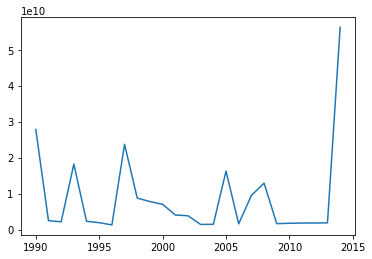

In [0]:
plt.figure()
plt.plot(years, sums)
plt.show()

In [0]:
pd_df = to_show.toPandas() #группируется в оперативной памяти

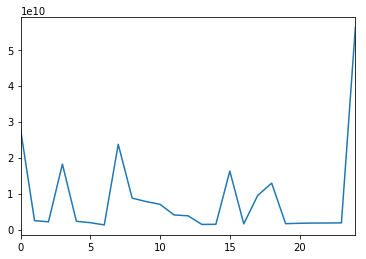

In [0]:
pd_df['sum(quantity)'].plot()

# Домашнее задание
- Скачайте dataset iris https://gist.github.com/netj/8836201
- Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров
- Визуализируйте точечный график (plt.scatter) по каждой паре параметров
- Попробуйте отделить какой-нить тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)
- Сделайте отдельную колонку для своего предсказания
- Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)

In [0]:
hw = spark.read.csv('iris.csv', inferSchema=True, header=True)
hw.take(10)

[Row(sepal.length=5.1, sepal.width=3.5, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.9, sepal.width=3.0, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.7, sepal.width=3.2, petal.length=1.3, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.6, sepal.width=3.1, petal.length=1.5, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=5.0, sepal.width=3.6, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=5.4, sepal.width=3.9, petal.length=1.7, petal.width=0.4, variety='Setosa'),
 Row(sepal.length=4.6, sepal.width=3.4, petal.length=1.4, petal.width=0.3, variety='Setosa'),
 Row(sepal.length=5.0, sepal.width=3.4, petal.length=1.5, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.4, sepal.width=2.9, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.9, sepal.width=3.1, petal.length=1.5, petal.width=0.1, variety='Setosa')]

In [0]:
hw.count()

150

In [0]:
hw.dtypes

[('sepal.length', 'double'),
 ('sepal.width', 'double'),
 ('petal.length', 'double'),
 ('petal.width', 'double'),
 ('variety', 'string')]

In [0]:
import re
hww = hw.toDF(*(re.sub(r'[\.\s]+', '_', c) for c in hw.columns)) 
hww.show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|
|         4.8|        3.4|         1.6|        0.2| Setosa|
|         4.8|        3.0|         1.4|        0.1| Setosa|
|         4.3|        3.0|         1.1| 

In [0]:
hww.toPandas()['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [0]:
hww.toPandas().describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
hw_filter1 = hww.where(hww['variety'] == 'Setosa')
hw_filter_1 = hw_filter1.drop('variety')
Setosa = hw_filter_1.toPandas().agg(['min', 'max', 'mean'])
Setosa

,sepal_length,sepal_width,petal_length,petal_width
min,4.300,2.300,1.000,0.100
max,5.800,4.400,1.900,0.600
mean,5.006,3.428,1.462,0.246


In [0]:
hw_filter2 = hww.where(hww['variety'] == 'Versicolor')
hw_filter_2 = hw_filter2.drop('variety')
Versicolor = hw_filter_2.toPandas().agg(['min', 'max', 'mean'])
Versicolor

,sepal_length,sepal_width,petal_length,petal_width
min,4.900,2.00,3.00,1.000
max,7.000,3.40,5.10,1.800
mean,5.936,2.77,4.26,1.326


In [0]:
hw_filter3 = hww.where(hww['variety'] == 'Virginica')
hw_filter_3 = hw_filter3.drop('variety')
Virginica = hw_filter_3.toPandas().agg(['min', 'max', 'mean'])
Virginica

,sepal_length,sepal_width,petal_length,petal_width
min,4.900,2.200,4.500,1.400
max,7.900,3.800,6.900,2.500
mean,6.588,2.974,5.552,2.026


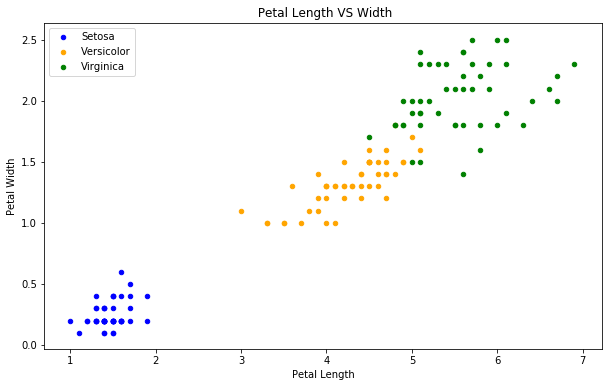

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

hww1 = hww.toPandas()
fig = hww1[hww1.variety=='Setosa'].plot.scatter(x='petal_length',y='petal_width',color='blue', label='Setosa')
hww1[hww1.variety=='Versicolor'].plot.scatter(x='petal_length',y='petal_width',color='orange', label='Versicolor',ax=fig)
hww1[hww1.variety=='Virginica'].plot.scatter(x='petal_length',y='petal_width',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


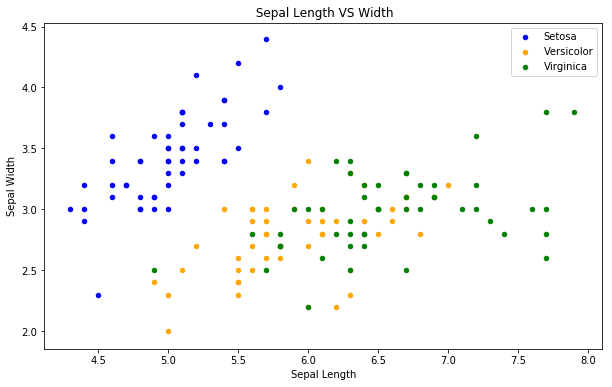

In [0]:
fig = hww1[hww1.variety=='Setosa'].plot.scatter(x='sepal_length',y='sepal_width',color='blue', label='Setosa')
hww1[hww1.variety=='Versicolor'].plot.scatter(x='sepal_length',y='sepal_width',color='orange', label='Versicolor',ax=fig)
hww1[hww1.variety=='Virginica'].plot.scatter(x='sepal_length',y='sepal_width',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title(" Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

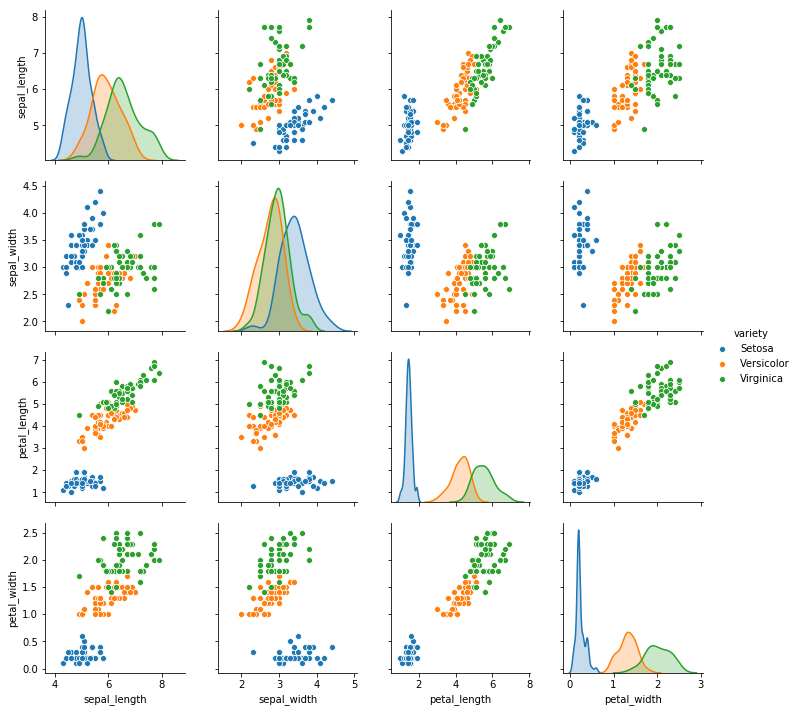

In [0]:
sns.pairplot(hww1[['sepal_length','sepal_width','petal_length','petal_width','variety']], hue = 'variety')

Судя по графикам Setosa сильно выделяется от двух других видов цветков

In [0]:
corr = hww1[['sepal_length','sepal_width','petal_length','petal_width']].corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Sepal Width и Sepal Length не коррелируются


---


Petal Width и Petal Length коррелируются достаточно высоко

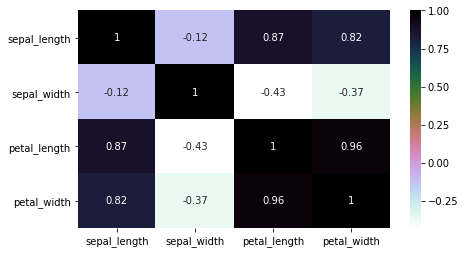

In [0]:
plt.figure(figsize=(7,4)) 
sns.heatmap(corr,annot=True,cmap='cubehelix_r')
plt.show()


Для определения вида цветков берем 2 параметра Petal Width и Petal Length. 
Проверяем: верно ли, что у ирисов не с типом Setosa - Petal Width >=1, а Length >=3

In [0]:
from pyspark.sql.functions import *
hww.withColumn('bool 1', hww['petal_width'] >= 1).withColumn('bool 2', hww['petal_length'] >= 3).withColumn('bool res', (hww['petal_width'] >= 1) & (hww['petal_length'] >= 3)).sort(desc('bool res')).show()


+------------+-----------+------------+-----------+----------+------+------+--------+
|sepal_length|sepal_width|petal_length|petal_width|   variety|bool 1|bool 2|bool res|
+------------+-----------+------------+-----------+----------+------+------+--------+
|         7.0|        3.2|         4.7|        1.4|Versicolor|  true|  true|    true|
|         5.9|        3.2|         4.8|        1.8|Versicolor|  true|  true|    true|
|         6.4|        3.2|         4.5|        1.5|Versicolor|  true|  true|    true|
|         6.9|        3.1|         4.9|        1.5|Versicolor|  true|  true|    true|
|         5.5|        2.3|         4.0|        1.3|Versicolor|  true|  true|    true|
|         6.5|        2.8|         4.6|        1.5|Versicolor|  true|  true|    true|
|         5.7|        2.8|         4.5|        1.3|Versicolor|  true|  true|    true|
|         6.3|        3.3|         4.7|        1.6|Versicolor|  true|  true|    true|
|         4.9|        2.4|         3.3|        1.0|Ver

Подсчитываем результаты сформированного правила

In [0]:
res = hww.withColumn('bool 1', hww['petal_width'] >= 1).withColumn('bool 2', hww['petal_length'] >= 3).withColumn('bool_res', (hww['petal_width'] >= 1) & (hww['petal_length'] >= 3))

In [0]:
res.filter(res.bool_res == True).groupby(res.variety).count().show()

+----------+-----+
|   variety|count|
+----------+-----+
| Virginica|   50|
|Versicolor|   50|
+----------+-----+



Правило оказалось верным в 100% случаев с цветками типа Virginica и Versicolor. Тип Setosa отделяется от двух других.

# **PART II** 

---



*   Подключите модель RandomForestClassifier из библиотеки scikit-learn
*   Обучите ее на iris’е (метод fit)
*   Оцените качество (accuracy, precision, recall)
*   Перед обучением - разделите данные на 2 категориии - для обучения и для проверки*
*   Обучите модель на данных для обучения и посчитайте метрики на данных для проверки*

In [0]:
x = hww1[['sepal_length','sepal_width', 'petal_length','petal_width']]
y = hww1['variety']

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [0]:
y  #преобразование текстового поля 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

#данные для обучения и данные для проверки 7:3

In [0]:
from warnings import simplefilter
#ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [0]:
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.21.2


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [115]:
rfc_model = RandomForestClassifier(max_depth=5)
rfc_model.fit(x_train,y_train)
rfc_predict = rfc_model.predict(x_test)
print ("accuracy: ", accuracy_score(y_test, rfc_predict))
print (classification_report(y_test, rfc_predict))


accuracy:  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.95      0.93        20
           2       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [0]:
#поиск наилучших параметров
from sklearn.model_selection import GridSearchCV
parameter_grid = {
            'criterion': ['entropy', 'gini'],
            'max_depth': [3, 5, 10],
            'n_estimators': [10, 20, 100]
        }
clf = RandomForestClassifier()
grid_searcher = GridSearchCV(clf, parameter_grid, verbose=2)
grid_searcher.fit(x_train, y_train)
clf_best = grid_searcher.best_estimator_
 
print('Best params = ', clf_best.get_params())


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] criterion=entropy, max_depth=3, n_estimators=10 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=3, n_estimators=10 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=3, n_estimators=10 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=3, n_estimators=20 .................
[CV] .. criterion=entropy, max_depth=3, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=3, n_estimators=100 ................
[CV] . criterion

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . criterion=entropy, max_depth=3, n_estimators=100, total=   0.1s
[CV] criterion=entropy, max_depth=3, n_estimators=100 ................
[CV] . criterion=entropy, max_depth=3, n_estimators=100, total=   0.1s
[CV] criterion=entropy, max_depth=5, n_estimators=10 .................
[CV] .. criterion=entropy, max_depth=5, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, n_estimators=10 .................
[CV] .. criterion=entropy, max_depth=5, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, n_estimators=10 .................
[CV] .. criterion=entropy, max_depth=5, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, n_estimators=20 .................
[CV] .. criterion=entropy, max_depth=5, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=5, n_estimators=20 .................
[CV] .. criterion=entropy, max_depth=5, n_estimators=20, total=   0.0s
[CV] criterion=entropy, max_depth=5, n_estimators=20 .................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    2.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [128]:
#применение других параметров
rfc_model = RandomForestClassifier(n_estimators=20, max_depth=3)
rfc_model.fit(x_train,y_train)
rfc_predict = rfc_model.predict(x_test)
print ("accuracy: ", accuracy_score(y_test, rfc_predict))
print (classification_report(y_test, rfc_predict))


accuracy:  0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.95      0.97        20
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

